In [95]:
from google.colab import drive

In [96]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# for loading dataset
import pandas as pd
import numpy as np
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split


In [98]:
data=pd.read_csv('/content/drive/MyDrive/dataset/lung_cancer.csv')

In [99]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [100]:
# features of dataset
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [101]:
# summary of the training dataset
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [102]:
data.isnull().sum(0)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [103]:
data.shape

(55394, 16)

In [104]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [105]:
data.nunique()

GENDER                    2
AGE                      64
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [106]:
data.rename(columns = {'CHRONIC DISEASE':'CHRONIC_DISEASE', 'ALCOHOL CONSUMING':'ALCOHOL_CONSUMING', 'SHORTNESS OF BREATH':'SHORTNESS_OF_BREATH',
                       'SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY', 'CHEST PAIN':'CHEST_PAIN'
}, inplace = True)

In [107]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [108]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC_DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


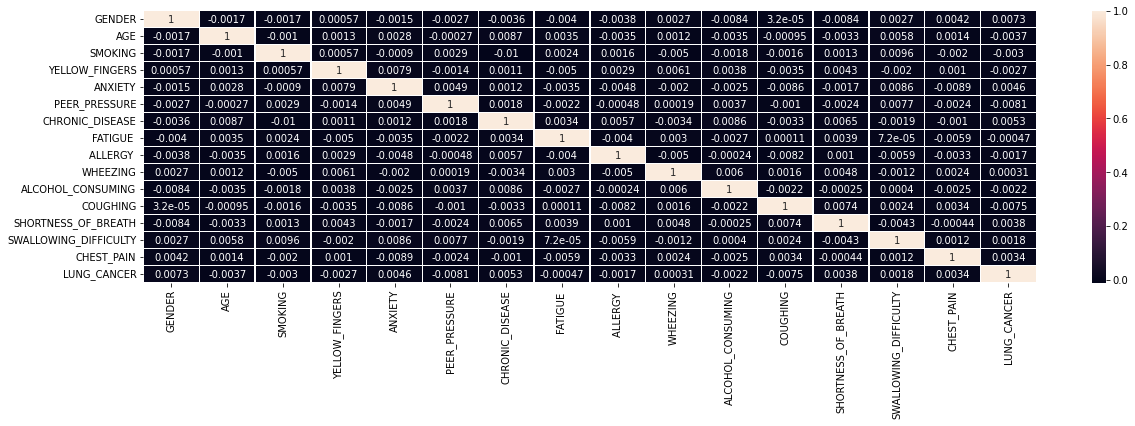

In [109]:
fig, ax = plt.subplots(figsize=(20,5))  
sns.heatmap(data.corr(), linewidths=.5, annot=True,ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4063decd0>,
      dtype=object)

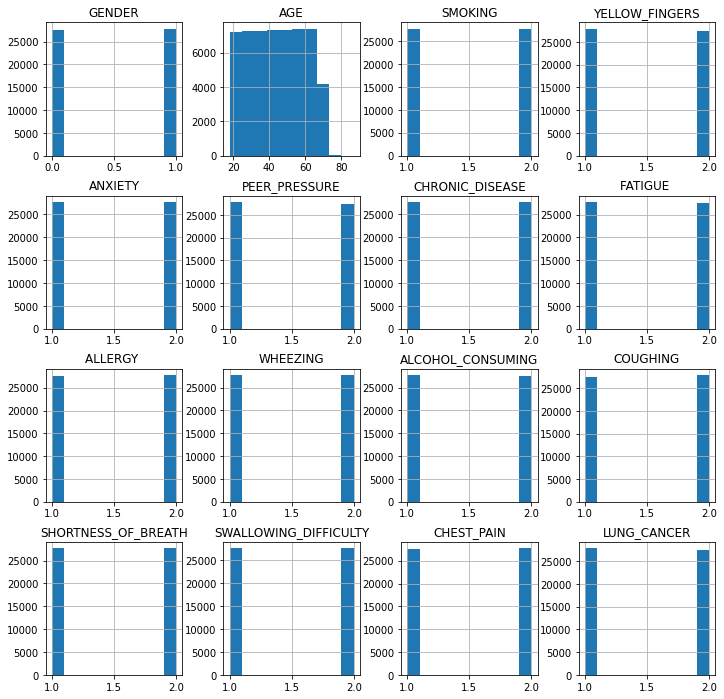

In [110]:
data.hist(figsize=(12,12), layout=(4,4), sharex=False)

GENDER                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
AGE                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
SMOKING                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
YELLOW_FINGERS            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ANXIETY                     AxesSubplot(0.125,0.518913;0.168478x0.16413)
PEER_PRESSURE            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CHRONIC_DISEASE          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
FATIGUE                  AxesSubplot(0.731522,0.518913;0.168478x0.16413)
ALLERGY                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
WHEEZING                 AxesSubplot(0.327174,0.321957;0.168478x0.16413)
ALCOHOL_CONSUMING        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
COUGHING                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
SHORTNESS_OF_BREATH            AxesSubplot(0.125,0.125;0.168478x0.16413)
SWALLOWING_DIFFICULTY       AxesSubplot(0.327174,0.

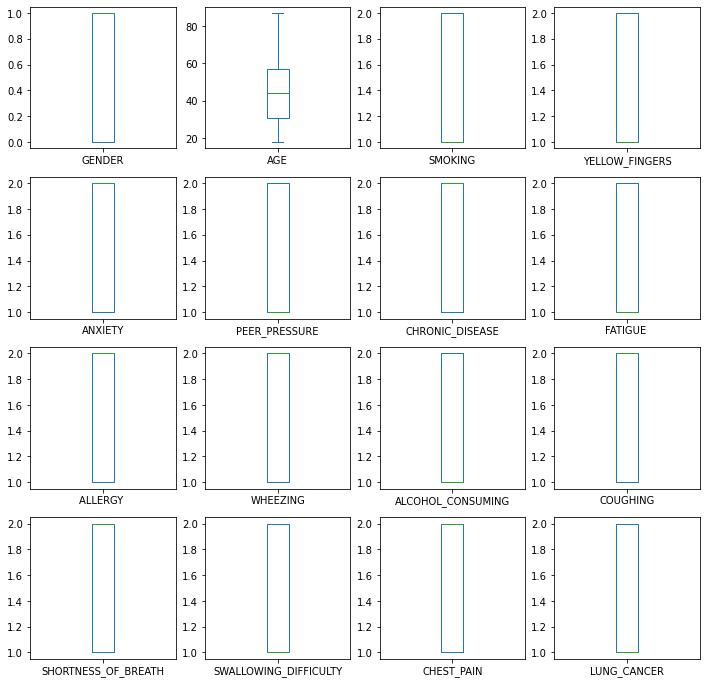

In [111]:
data.plot(kind="box", figsize=(12,12), layout=(4,4), sharex=False, subplots=True)

In [112]:
px.pie(data, values='LUNG_CANCER', names='LUNG_CANCER', title="Lung Cancer", color_discrete_sequence=px.colors.qualitative.T10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



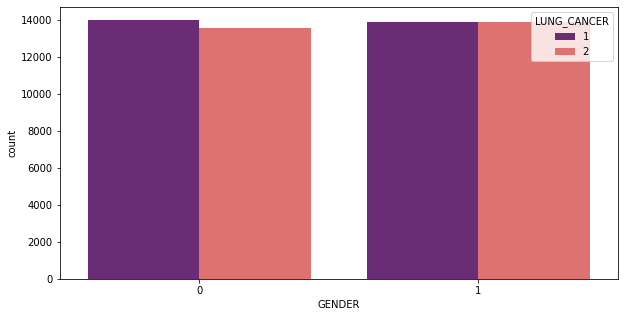

In [113]:
countplt, ax = plt.subplots(figsize = (10,5))
ax=sns.countplot(data['GENDER'], hue='LUNG_CANCER', data=data, palette='magma')

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X=data.iloc[:15]
target=data.LUNG_CANCER[::]

In [116]:
# X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, random_state=42)

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
data1=data.copy()

In [119]:
data1=data1.apply(LabelEncoder().fit_transform)

In [120]:
data1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,51,0,1,1,0,0,1,0,1,1,1,1,1,1,0
1,0,56,1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,1,41,0,0,0,1,0,1,0,1,0,1,1,0,1,1
3,0,45,1,1,1,0,0,0,0,0,1,0,0,1,1,1
4,1,45,0,1,0,0,0,0,0,1,0,1,1,0,0,1


In [121]:
# X=data1.iloc[:15]
# target=data1.LUNG_CANCER[::]
x = data.drop(['LUNG_CANCER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL_CONSUMING', 'COUGHING'], axis=1).values   # independant features
y = data['LUNG_CANCER'].values					# dependant variable

In [122]:
x

array([[0, 2, 1, ..., 2, 2, 2],
       [0, 1, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 1, 2],
       ...,
       [1, 2, 1, ..., 2, 1, 2],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 2, 2, ..., 2, 1, 1]])

In [123]:
#split data into train test
X_train, X_test, y_train, y_test=train_test_split(x, target, test_size=0.25, random_state=42)
X_train

array([[0, 2, 1, ..., 2, 2, 2],
       [0, 2, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 1, 2, 1],
       ...,
       [0, 1, 1, ..., 2, 2, 2],
       [1, 2, 2, ..., 2, 1, 2],
       [0, 2, 1, ..., 2, 2, 1]])

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
m=LogisticRegression()
# np.reshape(X_train, (-1,1))
X_train.shape
m.fit(X_train, y_train)


LogisticRegression()

In [126]:
predict=m.predict(X_test)

In [127]:
#@title Default title text
predict

array([2, 1, 1, ..., 1, 1, 1])

In [128]:
accuracy=round(accuracy_score(y_test, predict)*100, 2)

In [129]:
accuracy

50.05

In [130]:
from sklearn.svm import SVC

In [131]:
svm=SVC()
svm.fit(X_train, y_train)
pred=svm.predict(X_test)
accuracy_svm=round(accuracy_score(pred, y_test)*100,2)

In [132]:
accuracy_svm

50.57

In [133]:
from sklearn.tree import DecisionTreeClassifier


In [134]:
decision_t=DecisionTreeClassifier()
decision_t.fit(X_train, y_train)
pred_decision=decision_t.predict(X_test)
accuracy_decision=round(accuracy_score(pred_decision, y_test)*100,2)


In [135]:
accuracy_decision

50.81

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
r=RandomForestClassifier()
r.fit(X_train, y_train)
pred_r=r.predict(X_test)
accuracy_r=round(accuracy_score(pred_r, y_test)*100,2)


In [138]:
accuracy_r

50.91

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
accuracy_knn=round(accuracy_score(pred_knn, y_test)*100,2)

In [141]:
accuracy_knn

50.27